In [3]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.8.2
2.8.0


In [4]:
# to check GPU is present or not
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#importing mnist data from tensorflow datasets
mnist = tf.keras.datasets.mnist

In [10]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full[0].shape

(28, 28)

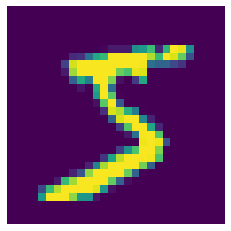

In [14]:
plt.imshow(X_train_full[0])
plt.axis("off")
plt.show()

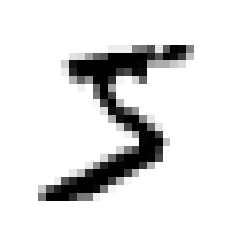

In [15]:
img = X_train_full[0]

plt.imshow(img, cmap="binary")     # binary is used to represent image in B&W
plt.axis("off")
plt.show()

In [18]:
X_train_full.max(), X_train_full.min()

(255, 0)

In [20]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255

In [23]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer"),
    tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
    tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
    tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")
]

In [24]:
clf_model = tf.keras.models.Sequential(LAYERS)

In [25]:
clf_model.layers

In [26]:
clf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


total trainable parameters = first_layer*second_layer + bias = = 784*300 + 300(bias) = 235500

In [27]:
235500+30100+1010

266610

In [29]:
weights, biases = clf_model.layers[1].get_weights()
weights.shape

(784, 300)

In [30]:
weights[0]

array([ 0.07291105,  0.01218582,  0.05201636,  0.04522216,  0.04246096,
        0.03177147,  0.04057445,  0.07342237,  0.00749827, -0.03724011,
       -0.04875146, -0.03247239, -0.07034075, -0.06865149, -0.02679498,
        0.00949114, -0.03116161,  0.06892793,  0.03576012, -0.00026202,
       -0.01206302, -0.05262216, -0.01639274, -0.03963816, -0.05738518,
        0.06525372, -0.01287834,  0.01879185,  0.00571955,  0.00352911,
       -0.07228949, -0.03560278, -0.05224103,  0.07158056, -0.0463361 ,
       -0.02072335,  0.06108007, -0.04642598,  0.0669425 ,  0.06494968,
        0.03724811,  0.00445279, -0.02535289, -0.01442616, -0.05667404,
       -0.04226594,  0.06297988, -0.06338762, -0.05970867,  0.05067995,
       -0.01940851, -0.0264453 ,  0.04013408,  0.02159302, -0.025756  ,
       -0.02699434, -0.00783908,  0.02578983, -0.05668399,  0.04418127,
       -0.01209892,  0.01575755, -0.05513565,  0.03404946,  0.01256622,
       -0.05583325, -0.07326346,  0.00663607, -0.01272434, -0.00

In [31]:
biases.shape

(300,)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
LOSS_Function = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ['accuracy']

clf_model.compile(loss = LOSS_Function, optimizer = OPTIMIZER, metrics = METRICS)

In [36]:
EPOCHS = 20
VALIDATION = (X_valid,y_valid)

history = clf_model.fit(X_train, y_train, epochs = EPOCHS, validation_data = VALIDATION)

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6085 - accuracy: 0.8444 - val_loss: 0.3017 - val_accuracy: 0.9196
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2858 - accuracy: 0.9193 - val_loss: 0.2457 - val_accuracy: 0.9288
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2345 - accuracy: 0.9332 - val_loss: 0.2011 - val_accuracy: 0.9440
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2011 - accuracy: 0.9428 - val_loss: 0.1765 - val_accuracy: 0.9518
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1767 - accuracy: 0.9504 - val_loss: 0.1609 - val_accuracy: 0.9582
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1573 - accuracy: 0.9554 - val_loss: 0.1446 - val_accuracy: 0.9600
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1413 - accuracy: 0.9599 - val_loss: 0.1337 - val_accuracy:

In [37]:
type(history.history)

dict

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.608497,0.844436,0.301706,0.9196
1,0.285813,0.919273,0.245727,0.9288
2,0.234452,0.933236,0.201100,0.9440
3,0.201088,0.942836,0.176465,0.9518
4,0.176672,0.950418,0.160939,0.9582
5,0.157252,0.955436,0.144622,0.9600
6,0.141318,0.959873,0.133666,0.9638
7,0.128176,0.964018,0.126024,0.9656
8,0.116934,0.966855,0.117264,0.9668
9,0.106899,0.970200,0.108829,0.9694


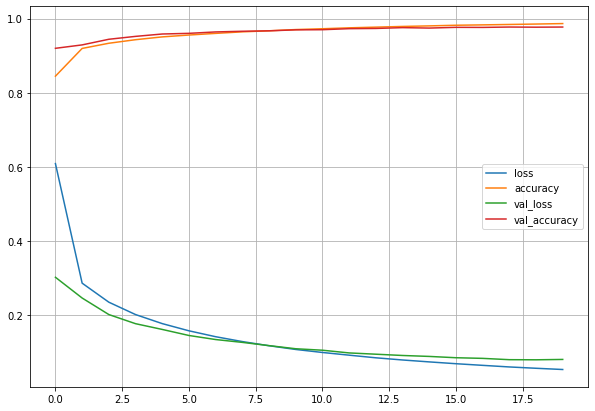

In [40]:
df.plot(figsize = (10,7))

plt.grid(True)
plt.show()

In [41]:
clf_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9737


[0.08394693583250046, 0.9736999869346619]

In [43]:
X_new = X_test[:3]

y_prob = clf_model.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 0.998, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.   ]], dtype=float32)

In [44]:
Y_pred= np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

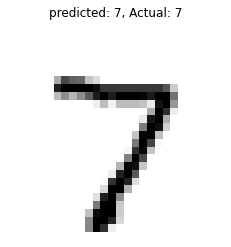

------------------------------------------------------------


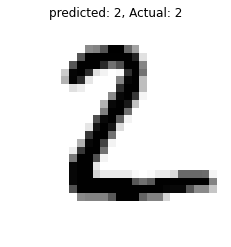

------------------------------------------------------------


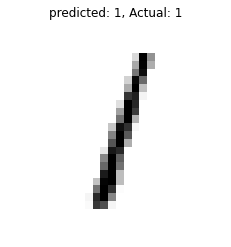

------------------------------------------------------------


In [45]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)